<a href="https://colab.research.google.com/github/Suriya6744/Project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

##PTT

In [665]:
import pandas as pd

In [666]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [667]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT.csv')
ptt.shape

(241, 7)

In [668]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,4/1/2022,38.00,38.25,38.50,38.00,59.50M,0.00%
1,5/1/2022,39.00,38.25,39.00,38.00,76.59M,2.63%
2,6/1/2022,38.00,38.50,38.75,38.00,71.68M,-2.56%
3,7/1/2022,38.75,38.50,38.75,38.25,59.56M,1.97%
4,10/1/2022,38.50,38.75,38.75,38.00,34.79M,-0.65%


In [669]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [670]:
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
ptt

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,38.00,59.50M
1,5/1/2022,39.00,76.59M
2,6/1/2022,38.00,71.68M
3,7/1/2022,38.75,59.56M
4,10/1/2022,38.50,34.79M
...,...,...,...
236,26/12/2022,32.25,39.66M
237,27/12/2022,32.50,80.79M
238,28/12/2022,32.75,49.82M
239,29/12/2022,32.75,61.35M


In [671]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)


In [672]:
ptt.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [673]:
ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)

In [674]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

In [675]:
# สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
    return value * 1000000

In [676]:
# ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)


In [677]:
ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)
ptt

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


In [678]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt

,date,cp_ptt,vol_ptt
0,4/1/2022,38.00,59500000
1,5/1/2022,39.00,76590000
2,6/1/2022,38.00,71680000
3,7/1/2022,38.75,59560000
4,10/1/2022,38.50,34790000
...,...,...,...
236,26/12/2022,32.25,39660000
237,27/12/2022,32.50,80790000
238,28/12/2022,32.75,49820000
239,29/12/2022,32.75,61350000


##SCG

In [679]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG.csv')
scg.shape


(241, 7)

In [680]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [681]:
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]
scg

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,6.15,183.00K
1,5/1/2022,6.25,1.15M
2,6/1/2022,6.10,133.50K
3,7/1/2022,6.10,205.10K
4,10/1/2022,6.15,144.40K
...,...,...,...
236,26/12/2022,4.80,37.00K
237,27/12/2022,4.84,62.50K
238,28/12/2022,4.86,41.50K
239,29/12/2022,4.88,47.90K


In [682]:
#scg['ปริมาณ']=scg['ปริมาณ'].astype(str)

In [683]:
scg.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [684]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


In [685]:
scg['ปริมาณ']=scg['ปริมาณ'].astype(int)
scg


,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


In [686]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

,date,cp_scg,vol_scg
0,4/1/2022,6.15,183000
1,5/1/2022,6.25,1150000
2,6/1/2022,6.10,133500
3,7/1/2022,6.10,205100
4,10/1/2022,6.15,144400
...,...,...,...
236,26/12/2022,4.80,37000
237,27/12/2022,4.84,62500
238,28/12/2022,4.86,41500
239,29/12/2022,4.88,47900


##SOLAR

In [687]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR.csv')
solar.shape


(241, 7)

In [688]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [689]:
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]
solar

,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,1.51,9.13M
1,5/1/2022,1.51,4.25M
2,6/1/2022,1.44,9.95M
3,7/1/2022,1.24,93.48M
4,10/1/2022,1.24,21.28M
...,...,...,...
236,26/12/2022,0.87,1.06M
237,27/12/2022,0.89,1.46M
238,28/12/2022,0.88,291.80K
239,29/12/2022,0.88,1.05M


In [690]:
solar.dtypes

วันเดือนปี     object
ล่าสุด        float64
ปริมาณ         object
dtype: object

In [691]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)


In [692]:
solar['ปริมาณ']=solar['ปริมาณ'].astype(int)
solar


,วันเดือนปี,ล่าสุด,ปริมาณ
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


In [693]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

,date,cp_solar,vol_solar
0,4/1/2022,1.51,9130000
1,5/1/2022,1.51,4250000
2,6/1/2022,1.44,9950000
3,7/1/2022,1.24,93480000
4,10/1/2022,1.24,21280000
...,...,...,...
236,26/12/2022,0.87,1060000
237,27/12/2022,0.89,1460000
238,28/12/2022,0.88,291800
239,29/12/2022,0.88,1050000


##USD

In [694]:
usd = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB.csv')
usd.shape

(260, 7)

In [695]:
usd.head()


,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,3/1/2022,33.24,33.24,33.370,33.130,NaN,0.03%
1,4/1/2022,33.25,33.24,33.365,33.225,NaN,0.03%
2,5/1/2022,33.19,33.26,33.290,33.120,NaN,-0.18%
3,6/1/2022,33.55,33.21,33.595,33.210,NaN,1.08%
4,7/1/2022,33.62,33.56,33.740,33.470,NaN,0.21%


In [696]:
usd=usd[['วันเดือนปี','ล่าสุด']]
usd

,วันเดือนปี,ล่าสุด
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


In [697]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
usd =usd .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_usd'})
usd

,date,cp_usd
0,3/1/2022,33.24
1,4/1/2022,33.25
2,5/1/2022,33.19
3,6/1/2022,33.55
4,7/1/2022,33.62
...,...,...
255,26/12/2022,34.69
256,27/12/2022,34.60
257,28/12/2022,34.78
258,29/12/2022,34.62


##WTI

In [698]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD.csv')
wti.shape

(310, 7)

In [699]:
wti=wti[['วันเดือนปี','ล่าสุด']]
wti

,วันเดือนปี,ล่าสุด
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


In [700]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,2/1/2022,76.03
1,3/1/2022,76.17
2,4/1/2022,77.25
3,5/1/2022,77.39
4,6/1/2022,79.69
...,...,...
305,26/12/2022,81.06
306,27/12/2022,79.84
307,28/12/2022,78.67
308,29/12/2022,78.67


##XAU

In [701]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD.csv')
xau.shape

(260, 7)

In [702]:
xau=xau[['วันเดือนปี','ล่าสุด']]
xau

,วันเดือนปี,ล่าสุด
0,3/1/2022,"1,800.85"
1,4/1/2022,"1,814.56"
2,5/1/2022,"1,809.53"
3,6/1/2022,"1,788.68"
4,7/1/2022,"1,795.63"
...,...,...
255,26/12/2022,"1,797.61"
256,27/12/2022,"1,813.93"
257,28/12/2022,"1,804.09"
258,29/12/2022,"1,814.89"


In [703]:
# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau

,date,cp_xau
0,3/1/2022,"1,800.85"
1,4/1/2022,"1,814.56"
2,5/1/2022,"1,809.53"
3,6/1/2022,"1,788.68"
4,7/1/2022,"1,795.63"
...,...,...
255,26/12/2022,"1,797.61"
256,27/12/2022,"1,813.93"
257,28/12/2022,"1,804.09"
258,29/12/2022,"1,814.89"


#Merge

In [704]:
tm1 = wti.merge(usd, how ='left', left_on=['date',], right_on=['date',])
tm1

,date,cp_wti,cp_usd
0,2/1/2022,76.03,NaN
1,3/1/2022,76.17,33.24
2,4/1/2022,77.25,33.25
3,5/1/2022,77.39,33.19
4,6/1/2022,79.69,33.55
...,...,...,...
305,26/12/2022,81.06,34.69
306,27/12/2022,79.84,34.60
307,28/12/2022,78.67,34.78
308,29/12/2022,78.67,34.62


In [705]:
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm2

,date,cp_wti,cp_usd,cp_xau
0,2/1/2022,76.03,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85"
2,4/1/2022,77.25,33.25,"1,814.56"
3,5/1/2022,77.39,33.19,"1,809.53"
4,6/1/2022,79.69,33.55,"1,788.68"
...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61"
306,27/12/2022,79.84,34.60,"1,813.93"
307,28/12/2022,78.67,34.78,"1,804.09"
308,29/12/2022,78.67,34.62,"1,814.89"


In [706]:
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm3

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt
0,2/1/2022,76.03,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0
...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0


In [707]:
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm4

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0
...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0


In [708]:
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
tm5

,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2/1/2022,76.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/1/2022,76.17,33.24,"1,800.85",NaN,NaN,NaN,NaN,NaN,NaN
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0,1.44,9950000.0
...,...,...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [709]:
tm5.isnull().any()

date         False
cp_wti       False
cp_usd        True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [710]:
all_data= tm5.dropna()
all_data


,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4/1/2022,77.25,33.25,"1,814.56",38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5/1/2022,77.39,33.19,"1,809.53",39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6/1/2022,79.69,33.55,"1,788.68",38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7/1/2022,79.07,33.62,"1,795.63",38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10/1/2022,78.70,33.62,"1,801.41",38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26/12/2022,81.06,34.69,"1,797.61",32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27/12/2022,79.84,34.60,"1,813.93",32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28/12/2022,78.67,34.78,"1,804.09",32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29/12/2022,78.67,34.62,"1,814.89",32.75,61350000.0,4.88,47900.0,0.88,1050000.0


In [711]:
all_data['cp_xau'] = all_data['cp_xau'].str.replace(',', '').astype(float)

<ipython-input-711-9b1f2f07f0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['cp_xau'] = all_data['cp_xau'].str.replace(',', '').astype(float)


In [712]:
all_data['date'] = all_data['date'].str.replace('/', '-')

<ipython-input-712-f8a975dcb8ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['date'] = all_data['date'].str.replace('/', '-')


In [713]:
# save data
#all_data.to_csv('Project_data.csv', index=False)


#XGBoost Model

In [714]:
all_data


,date,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
2,4-1-2022,77.25,33.25,1814.56,38.00,59500000.0,6.15,183000.0,1.51,9130000.0
3,5-1-2022,77.39,33.19,1809.53,39.00,76590000.0,6.25,1150000.0,1.51,4250000.0
4,6-1-2022,79.69,33.55,1788.68,38.00,71680000.0,6.10,133500.0,1.44,9950000.0
5,7-1-2022,79.07,33.62,1795.63,38.75,59560000.0,6.10,205100.0,1.24,93480000.0
7,10-1-2022,78.70,33.62,1801.41,38.50,34790000.0,6.15,144400.0,1.24,21280000.0
...,...,...,...,...,...,...,...,...,...,...
305,26-12-2022,81.06,34.69,1797.61,32.25,39660000.0,4.80,37000.0,0.87,1060000.0
306,27-12-2022,79.84,34.60,1813.93,32.50,80790000.0,4.84,62500.0,0.89,1460000.0
307,28-12-2022,78.67,34.78,1804.09,32.75,49820000.0,4.86,41500.0,0.88,291800.0
308,29-12-2022,78.67,34.62,1814.89,32.75,61350000.0,4.88,47900.0,0.88,1050000.0


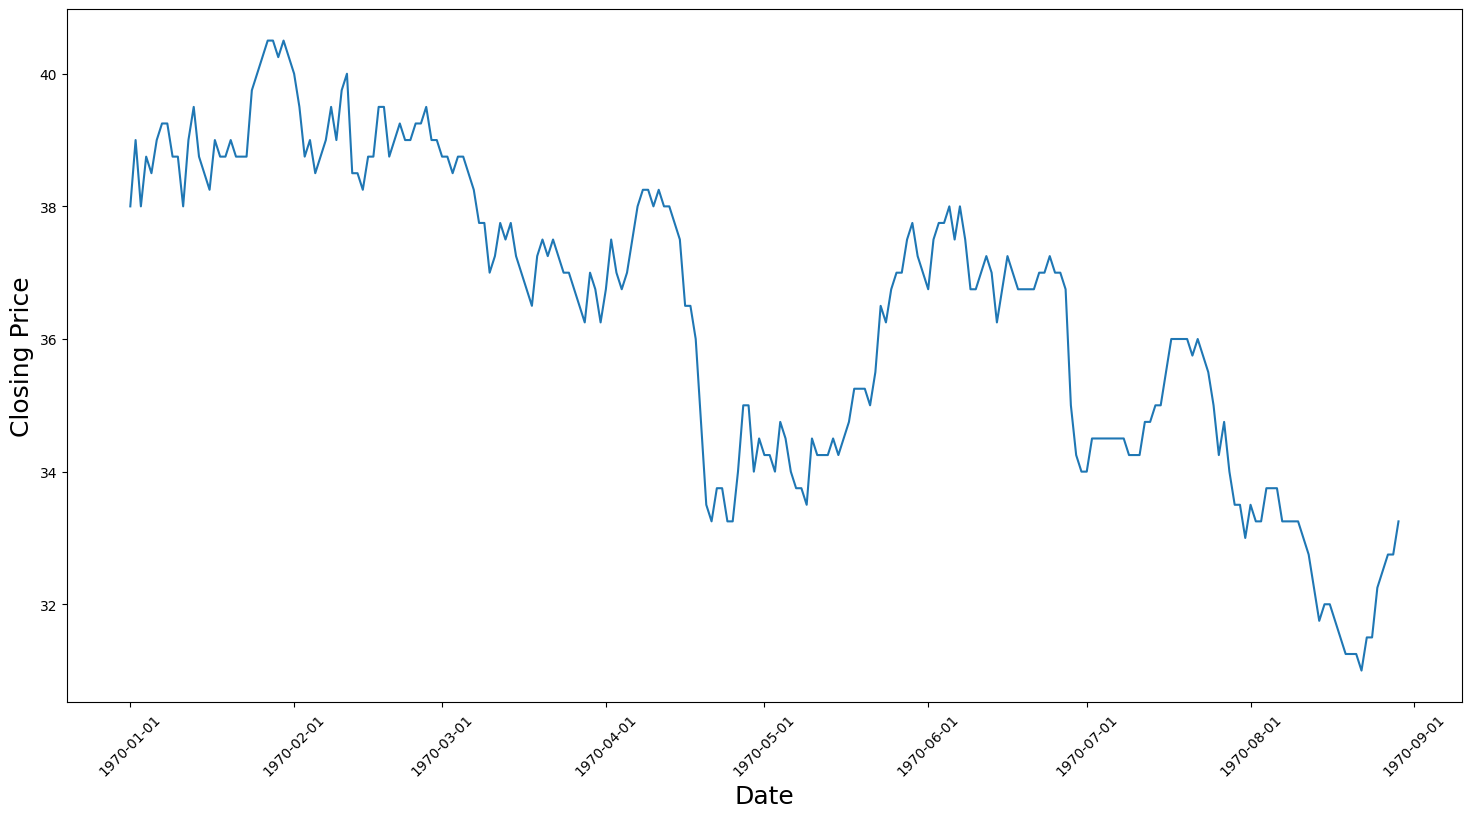

In [715]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
plt.plot(range(len(all_data)), all_data['cp_ptt'])
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()

In [716]:
correlation_matrix = all_data.corr()
correlation_matrix

<ipython-input-716-5b484e1d595a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = all_data.corr()


,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,-0.288717,0.551286,0.352413,0.065507,-0.051686,0.021420,0.365144,0.252468
cp_usd,-0.288717,1.000000,-0.871925,-0.585569,-0.116166,-0.622965,-0.136218,-0.354033,-0.144074
cp_xau,0.551286,-0.871925,1.000000,0.479219,0.109695,0.318857,0.063162,0.335451,0.196218
cp_ptt,0.352413,-0.585569,0.479219,1.000000,-0.054268,0.625622,0.000409,0.726447,0.174842
vol_ptt,0.065507,-0.116166,0.109695,-0.054268,1.000000,0.055487,0.050129,-0.129876,-0.115436
cp_scg,-0.051686,-0.622965,0.318857,0.625622,0.055487,1.000000,0.326282,0.557767,0.038970
vol_scg,0.021420,-0.136218,0.063162,0.000409,0.050129,0.326282,1.000000,0.063774,0.021532
cp_solar,0.365144,-0.354033,0.335451,0.726447,-0.129876,0.557767,0.063774,1.000000,0.336721
vol_solar,0.252468,-0.144074,0.196218,0.174842,-0.115436,0.038970,0.021532,0.336721,1.000000


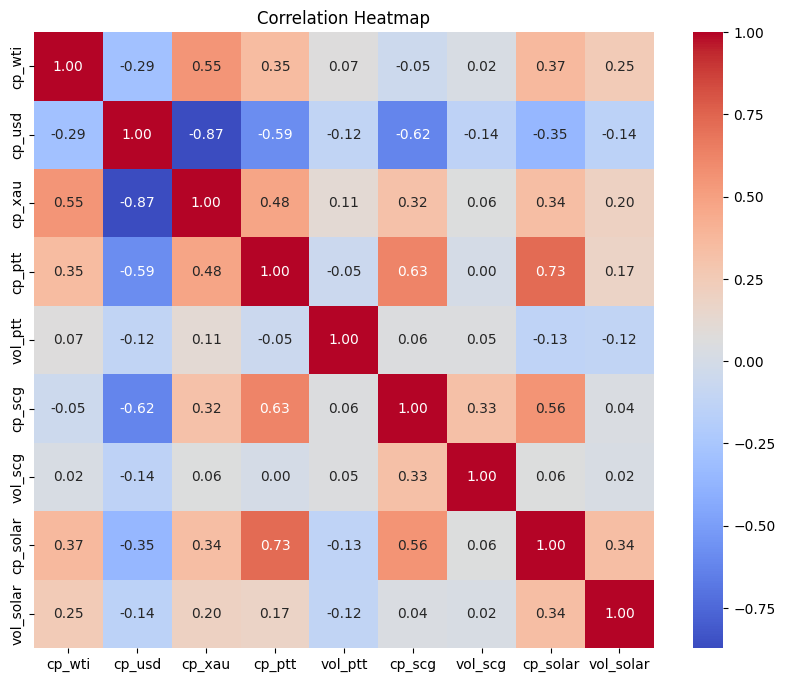

In [717]:
# Create a heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##หาพารามิเตอร์ที่เหมาะสมกับโมเดล

In [718]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = all_data[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = all_data['cp_ptt']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 150
Best max_depth: 9


In [719]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = all_data[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = all_data['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=150,  # You can adjust other parameters here
        max_depth=9,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")


Learning Rate: 0.01, Mean Squared Error: 62.276468163032625
Learning Rate: 0.1, Mean Squared Error: 1.1262157984439205
Learning Rate: 0.2, Mean Squared Error: 1.2609364161562182
Learning Rate: 0.3, Mean Squared Error: 1.2032836479067592
Learning Rate: 0.4, Mean Squared Error: 1.1791017505443329


In [720]:
# Define a list of learning rates to test
#learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
#for learning_rate in learning_rates:
 #      n_estimators=150,  # You can adjust other parameters here
  #      max_depth=9,
   #     learning_rate=learning_rate,
    #    objective='reg:squarederror'
    #)
    #model.fit(X_train, y_train)
    #y_pred = model.predict(X_test)
   # mse = mean_squared_error(y_test, y_pred)
    #print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Mean Squared Error: 1.1262157984439205


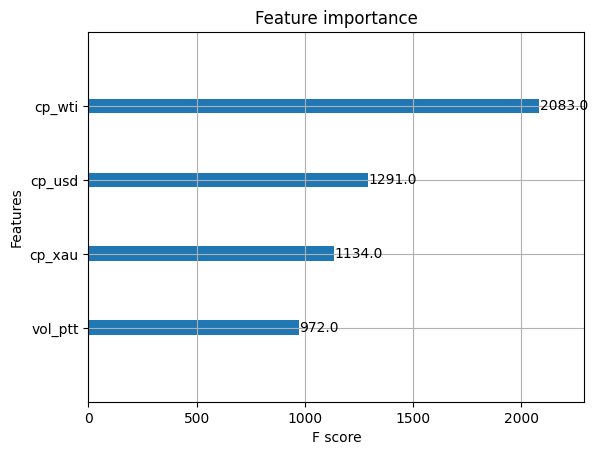

In [721]:
import matplotlib.pyplot as plt

# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=150,
    max_depth=9,
    learning_rate=0.1,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance analysis (optional)
plot_importance(model)
plt.show()


##กราฟเปรียบเทียบค่าพยากรณ์กับค่าจริง

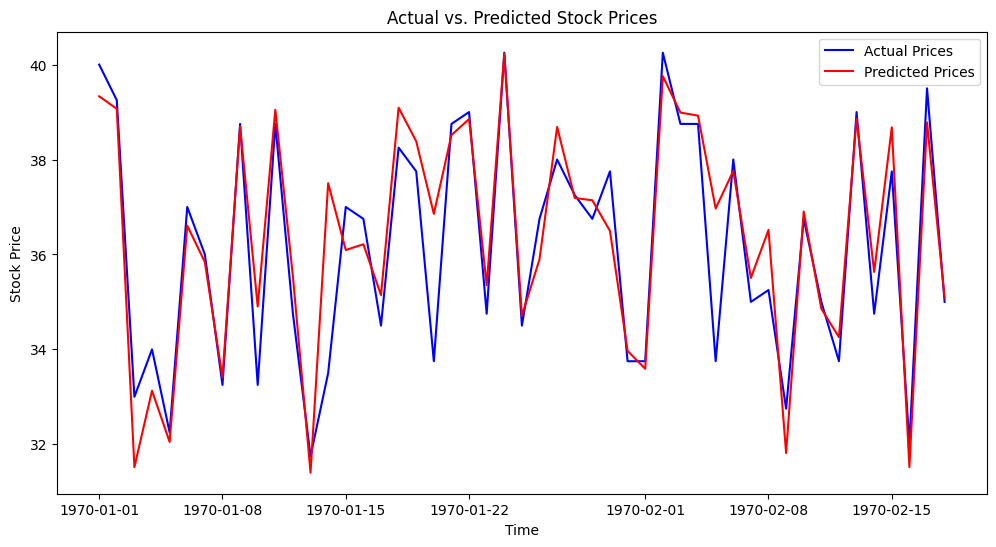

In [722]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

In [723]:
import pandas as pd

# Your y_pred and y_test data
y_test = pd.Series(y_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_pred': y_pred, 'y_test': y_test})
comparison_df=comparison_df.rename(columns={'y_pred':'Predicted','y_test':'Actual'})
# Print the comparison table
comparison_df.head()


,Predicted,Actual
31,39.331856,40.00
9,39.068169,39.25
286,31.519186,33.00
270,33.128326,34.00
305,32.049175,32.25


## Standardize

In [724]:
all_data_X = all_data[['cp_wti', 'cp_usd', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]

In [725]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit และ Transform ข้อมูล
scaled_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
scaled_df = pd.DataFrame(scaled_data, columns=all_data_X.columns)

# แสดงผลลัพธ์
scaled_df

,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,-1.402527,-1.100940,0.150488,0.700069,0.060415,3.242433,0.362923,3.496903,-0.157981
1,-1.391462,-1.137859,0.095370,1.131294,0.690430,3.551029,3.807543,3.496903,-0.265913
2,-1.209679,-0.916344,-0.133104,0.700069,0.509425,3.088135,0.186596,2.876057,-0.139845
3,-1.258682,-0.873271,-0.056946,1.023487,0.062627,3.088135,0.441647,1.102213,1.707604
4,-1.287925,-0.873271,0.006391,0.915681,-0.850508,3.242433,0.225423,1.102213,0.110743
...,...,...,...,...,...,...,...,...,...
236,-1.101400,-0.214877,-0.035249,-1.779472,-0.670978,-0.923611,-0.157154,-2.179400,-0.336467
237,-1.197824,-0.270256,0.143585,-1.671666,0.845262,-0.800172,-0.066318,-2.002015,-0.327620
238,-1.290296,-0.159498,0.035758,-1.563860,-0.296434,-0.738453,-0.141124,-2.090708,-0.353457
239,-1.290296,-0.257950,0.154104,-1.563860,0.128614,-0.676734,-0.118326,-2.090708,-0.336688


In [726]:
correlation_matrix = scaled_df.corr()
correlation_matrix

,cp_wti,cp_usd,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,-0.288717,0.551286,0.352413,0.065507,-0.051686,0.021420,0.365144,0.252468
cp_usd,-0.288717,1.000000,-0.871925,-0.585569,-0.116166,-0.622965,-0.136218,-0.354033,-0.144074
cp_xau,0.551286,-0.871925,1.000000,0.479219,0.109695,0.318857,0.063162,0.335451,0.196218
cp_ptt,0.352413,-0.585569,0.479219,1.000000,-0.054268,0.625622,0.000409,0.726447,0.174842
vol_ptt,0.065507,-0.116166,0.109695,-0.054268,1.000000,0.055487,0.050129,-0.129876,-0.115436
cp_scg,-0.051686,-0.622965,0.318857,0.625622,0.055487,1.000000,0.326282,0.557767,0.038970
vol_scg,0.021420,-0.136218,0.063162,0.000409,0.050129,0.326282,1.000000,0.063774,0.021532
cp_solar,0.365144,-0.354033,0.335451,0.726447,-0.129876,0.557767,0.063774,1.000000,0.336721
vol_solar,0.252468,-0.144074,0.196218,0.174842,-0.115436,0.038970,0.021532,0.336721,1.000000


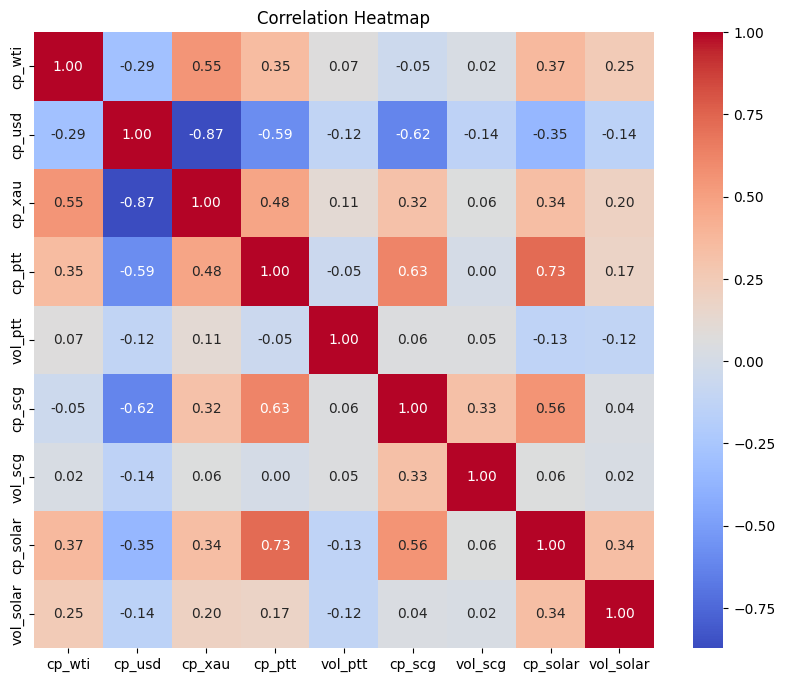

In [727]:
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

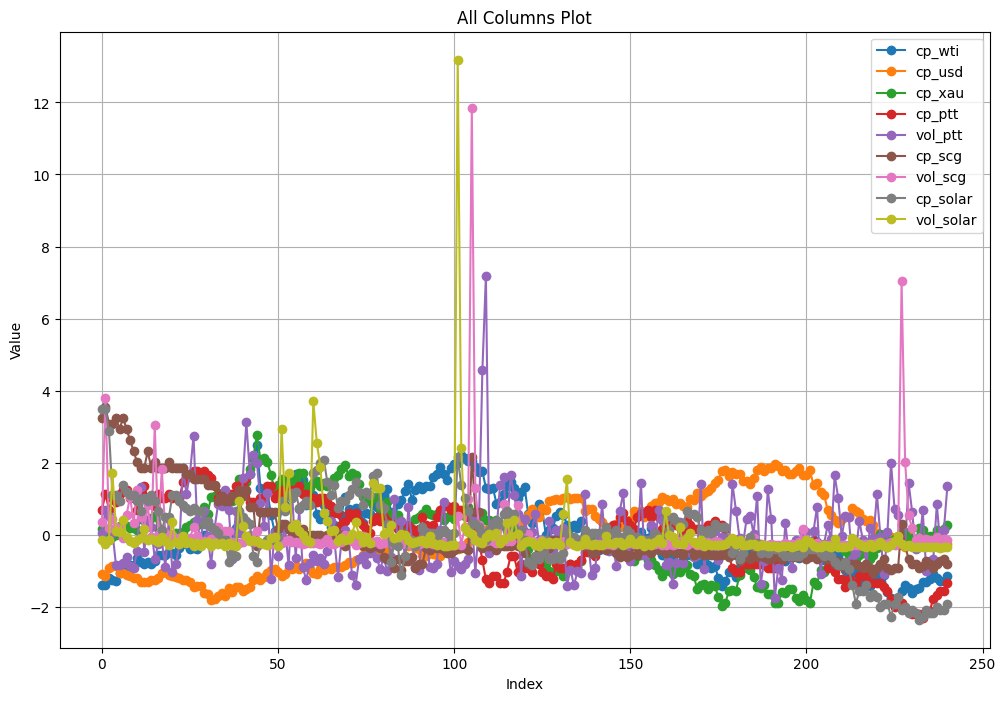

In [728]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
for column in scaled_df.columns:
    plt.plot(scaled_df.index, scaled_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [729]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import plot_importance
import matplotlib.pyplot as pl

X = scaled_df[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = scaled_df['cp_ptt']  # Replace with your target variable

# Create an XGBoost regressor
model = xgb.XGBRegressor()

# Define a grid of n_estimators values to search
param_grid = {
    'n_estimators': [50, 100, 150, 200]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best n_estimators value
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best n_estimators: {best_n_estimators}")

# Define a grid of max_depth values to search
param_grid = {
    'max_depth': [3, 5, 7, 9]  # Adjust the values as needed
}

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

# Get the best max_depth value
best_max_depth = grid_search.best_params_['max_depth']
print(f"Best max_depth: {best_max_depth}")

Best n_estimators: 50
Best max_depth: 9


In [730]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
X = scaled_df[['cp_wti',	'cp_usd','cp_xau','vol_ptt']]  # Replace with your independent variables
y = scaled_df['cp_ptt']  # Replace with your target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define a list of learning rates to test
learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4]  # Adjust the values as needed

# Try different learning rates and evaluate model performance
for learning_rate in learning_rates:
    model = xgb.XGBRegressor(
        n_estimators=50,  # You can adjust other parameters here
        max_depth=9,
        learning_rate=learning_rate,
        objective='reg:squarederror'
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Learning Rate: {learning_rate}, Mean Squared Error: {mse}")

Learning Rate: 0.01, Mean Squared Error: 0.702882078488443
Learning Rate: 0.1, Mean Squared Error: 0.24431443326474636
Learning Rate: 0.2, Mean Squared Error: 0.2213619521193526
Learning Rate: 0.3, Mean Squared Error: 0.23900371075961913
Learning Rate: 0.4, Mean Squared Error: 0.26589337224732973


Mean Squared Error: 0.2213619521193526


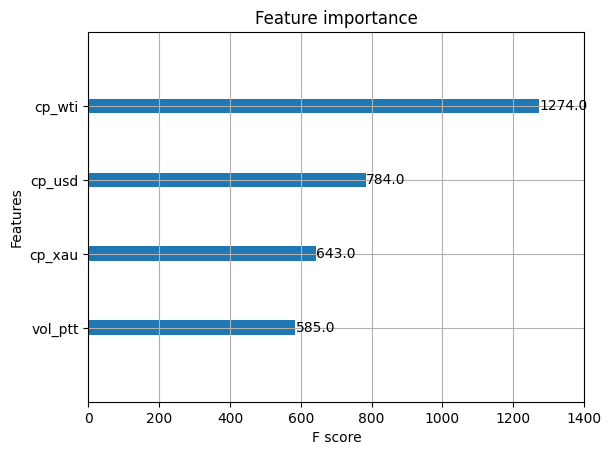

In [731]:
import matplotlib.pyplot as plt

# Create and train the XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,
    max_depth=9,
    learning_rate=0.2,
    objective='reg:squarederror'
)

model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Feature importance analysis (optional)
plot_importance(model)
plt.show()


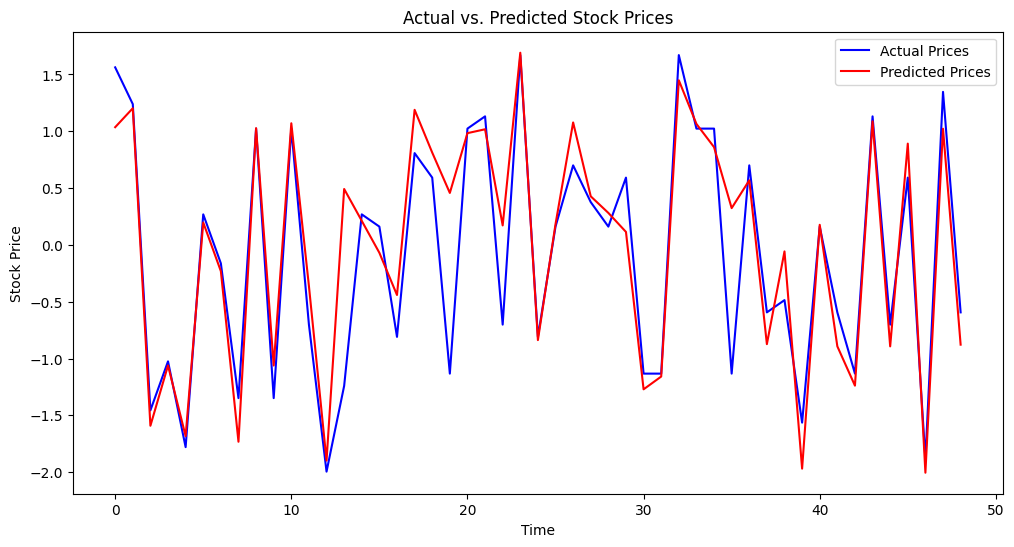

In [732]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

#ARIMA-GARCH

In [733]:
ai = all_data[['date','cp_ptt','cp_wti','cp_usd','cp_xau','vol_ptt']]
ai

,date,cp_ptt,cp_wti,cp_usd,cp_xau,vol_ptt
2,4-1-2022,38.00,77.25,33.25,1814.56,59500000.0
3,5-1-2022,39.00,77.39,33.19,1809.53,76590000.0
4,6-1-2022,38.00,79.69,33.55,1788.68,71680000.0
5,7-1-2022,38.75,79.07,33.62,1795.63,59560000.0
7,10-1-2022,38.50,78.70,33.62,1801.41,34790000.0
...,...,...,...,...,...,...
305,26-12-2022,32.25,81.06,34.69,1797.61,39660000.0
306,27-12-2022,32.50,79.84,34.60,1813.93,80790000.0
307,28-12-2022,32.75,78.67,34.78,1804.09,49820000.0
308,29-12-2022,32.75,78.67,34.62,1814.89,61350000.0


In [734]:
ai.set_index('date', inplace=True)

In [735]:
!pip install arch
import pandas as pd
import numpy as np
from arch import arch_model
import statsmodels.api as sm

In [736]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


# ทำ ADF Test
adf_result = adfuller(ai['cp_ptt'])

# แสดงผลลัพธ์
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])


ADF Statistic: -1.2531437339125961
p-value: 0.6503274228098432
Critical Values: {'1%': -3.4578942529658563, '5%': -2.8736593200231484, '10%': -2.573228767361111}


In [737]:
# ลบค่าก่อนหน้าเพื่อทำให้ข้อมูล stationary
#ใชการแปลงอนุกรมเวลาให้มีค่าเฉลี่ยคงที่โดยหาผลต่างครั้งที่ d=1
ai['cp_ptt_diff'] = ai['cp_ptt'].diff()
ai.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย

# ทำ ADF Test อีกครั้ง
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(ai['cp_ptt_diff'])
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: -15.175035290317654
p-value: 6.312317313857727e-28
Critical Values: {'1%': -3.458010773719797, '5%': -2.8737103617125186, '10%': -2.5732559963936206}


<ipython-input-737-a9154dd938b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai['cp_ptt_diff'] = ai['cp_ptt'].diff()
<ipython-input-737-a9154dd938b1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ai.dropna(inplace=True)  # ลบแถวที่มีค่าที่ขาดหาย


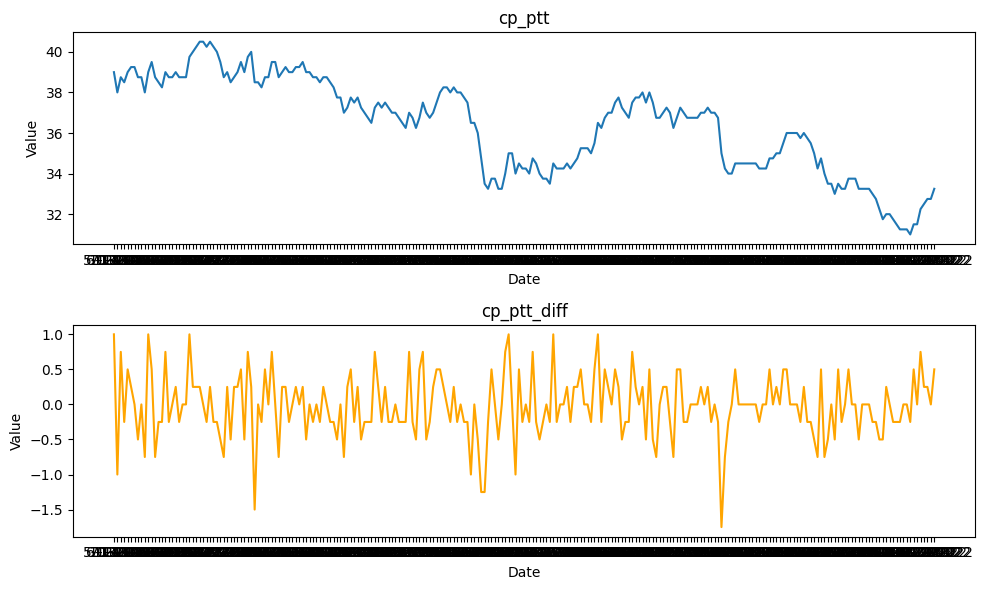

In [738]:
import matplotlib.pyplot as plt

# สร้าง subplot 2x1
fig, axes = plt.subplots(2, 1, figsize=(10, 6))

# วาดกราฟของ 'cp_ptt' ใน subplot แรก
axes[0].plot(ai.index, ai['cp_ptt'], label='cp_ptt')
axes[0].set_title('cp_ptt')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')

# วาดกราฟของ 'cp_ptt_diff' ใน subplot ที่สอง
axes[1].plot(ai.index, ai['cp_ptt_diff'], label='cp_ptt_diff', color='orange')
axes[1].set_title('cp_ptt_diff')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Value')

# ปรับแต่งรูปร่างและตำแหน่งของ subplot
plt.tight_layout()

# แสดง subplot
plt.show()


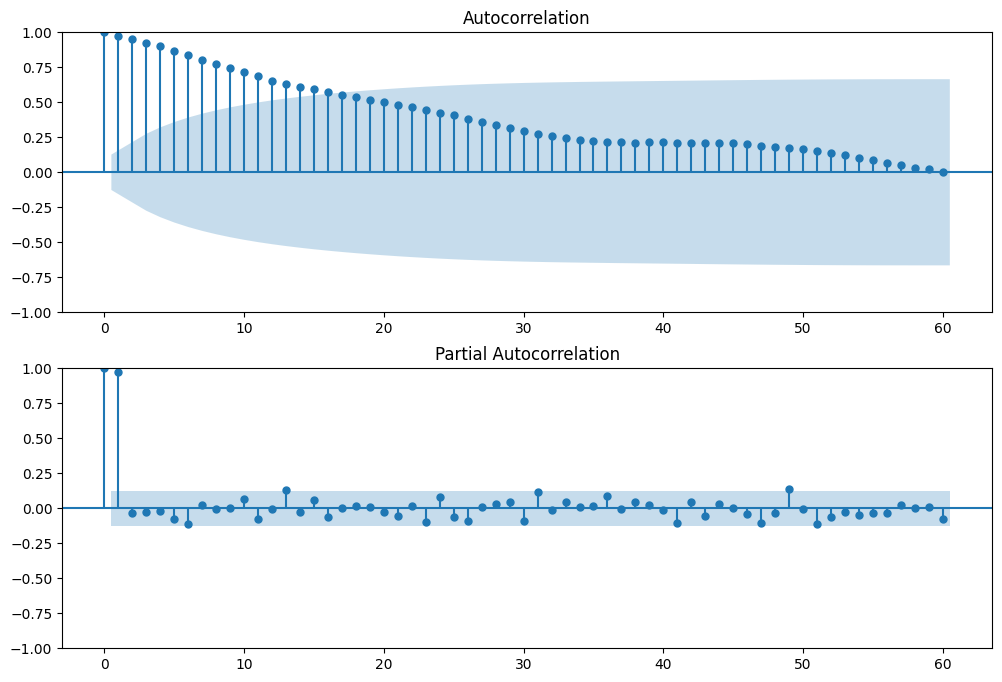

In [739]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# ทำนายรายละเอียดของพารามิเตอร์ p และ q จาก ACF และ PACF plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
sm.graphics.tsa.plot_acf(ai['cp_ptt'], lags=60, ax=ax1)
sm.graphics.tsa.plot_pacf(ai['cp_ptt'], lags=60, ax=ax2)
plt.show()


In [740]:
import itertools
import pandas as pd
import statsmodels.api as sm

# สร้างชุดข้อมูลของคุณ (เปลี่ยนให้เป็นข้อมูลจริง)
data = ai['cp_ptt_diff']

# สร้างเซตของค่า p, d, และ q ที่คุณต้องการทดลอง
p_values = range(1, 3)  # เลือกค่า p จาก 1 ถึง 2
d_values = [1]  # ค่า d ต้องเป็น 1 สำหรับ ARIMA
q_values = range(1, 16)  # เลือกค่า q จาก 1 ถึง 15

# สร้างรายการค่า AIC และพารามิเตอร์ที่เกี่ยวข้อง
aic_values = []
params = []

# วนลูปผสานค่า p, d, และ q
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        # สร้างแบบจำลอง ARIMA
        model = sm.tsa.ARIMA(data, order=(p, d, q))

        # ปรับโมเดล
        results = model.fit()

        # นับค่า AIC และเก็บค่า AIC และพารามิเตอร์
        aic = results.aic
        aic_values.append(aic)
        params.append((p, d, q))

        print(f'ARIMA({p},{d},{q}) - AIC: {aic}')

    except Exception as e:
        continue

# หาค่า AIC ที่ดีที่สุดและพารามิเตอร์ที่เกี่ยวข้อง
best_aic = min(aic_values)
best_params = params[aic_values.index(best_aic)]

print(f'Best AIC: {best_aic}')
print(f'Best Model (p, d, q): {best_params}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,1) - AIC: 300.7089482399206


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,2) - AIC: 302.3854903789911


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,3) - AIC: 304.3368862091859


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,4) - AIC: 306.32914861474046


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,5) - AIC: 308.27772725178767


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,6) - AIC: 308.1530215317006
ARIMA(1,1,7) - AIC: 310.19271016374955


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,8) - AIC: 311.5290288858406


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,9) - AIC: 313.52904536444794


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,10) - AIC: 315.5226446525314


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,11) - AIC: 315.34226943749826


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,12) - AIC: 309.4929478025973


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,13) - AIC: 302.27016821411434


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,14) - AIC: 304.2603189083753


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(1,1,15) - AIC: 305.0791825598312


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,1) - AIC: 302.7020944591566


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,2) - AIC: 304.33622325654324


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,3) - AIC: 300.43671288120214


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)


ARIMA(2,1,4) - AIC: 303.3021253892581


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self

ARIMA(2,1,5) - AIC: 303.6321472983192


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/u

ARIMA(2,1,6) - AIC: 305.1288034606663
ARIMA(2,1,7) - AIC: 306.16520454317134


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,8) - AIC: 301.9991978382548


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,9) - AIC: 303.8868810675717


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, fre

ARIMA(2,1,10) - AIC: 308.29802370121905


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,11) - AIC: 300.5164787104516


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,12) - AIC: 301.9756649915107


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,13) - AIC: 303.9791217269604


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

ARIMA(2,1,14) - AIC: 303.2333838989549


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2,1,15) - AIC: 305.5880065468424
Best AIC: 300.43671288120214
Best Model (p, d, q): (2, 1, 3)


In [741]:
# import statsmodels.api as sm
# from statsmodels.tsa.arima.model import ARIMA

# สร้างตัวแบบ ARIMA โดยกำหนดค่า p, d, และ q

# model = ARIMA(ai['cp_ptt_diff'], order=(2,1, 3))

# # ปรับแต่งตัวแบบด้วยข้อมูล
# results = model.fit()

# # แสดงสรุปของโมเดล
# print(results.summary())


In [742]:
# แบ่งข้อมูลเป็นชุดการฝึกสอนและชุดทดสอบ
data = ai['cp_ptt_diff']
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]

# สร้างโมเดล ARIMA(2,1,3)
order = (2, 1, 3)
model = ARIMA(train, order=order)
model_fit = model.fit()

# ทำนายค่า cp_ptt ในชุดทดสอบ
forecasted_values = model_fit.forecast(steps=len(test))

# คำนวณค่า MSE
mse = mean_squared_error(test, forecasted_values, squared=True)
print(f'Mean Squared Error (MSE): {mse*100}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  _index = to_datetime(index)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Sp

Mean Squared Error (MSE): 12.359231042450979


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


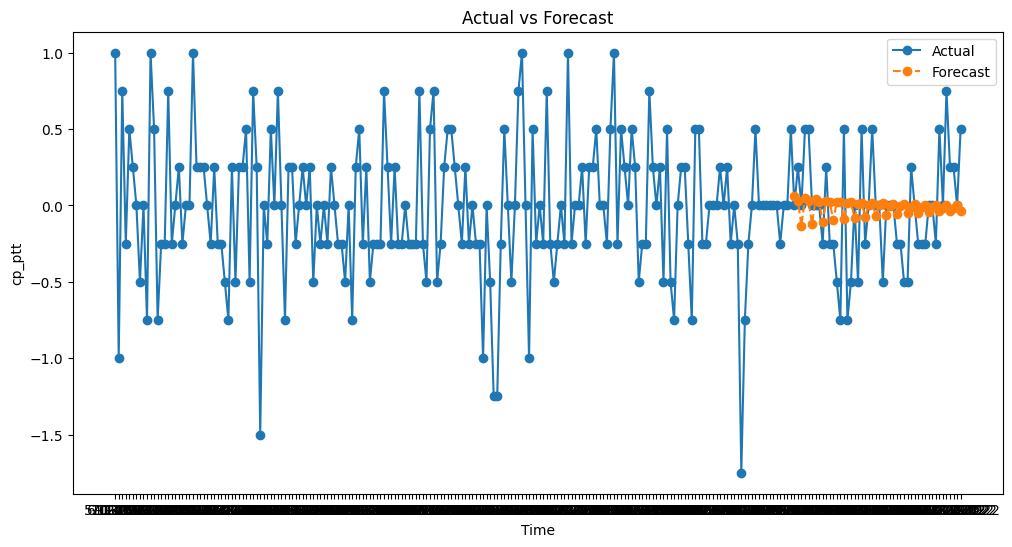

In [743]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่าจริงและค่าพยากรณ์
plt.figure(figsize=(12, 6))
plt.plot(data, label='Actual', marker='o', linestyle='-')
plt.plot(test.index, forecasted_values, label='Forecast', marker='o', linestyle='--')
plt.title('Actual vs Forecast')
plt.xlabel('Time')
plt.ylabel('cp_ptt')
plt.xticks(rotation=0)
plt.legend()
plt.show()


In [744]:
import arch
from arch import arch_model

# สร้างและฟิตโมเดล ARIMA-GARCH
arima_order = (2, 1, 3)  # ตัวแปร ARIMA(2,1,3)
garch_order = (2, 3)     # ตัวแปร GARCH(1,1)

# สร้างและฟิตโมเดล ARIMA-GARCH
model = arch_model(ai['cp_ptt_diff'], x=ai[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt']],
                   vol='Garch', p=garch_order[0], q=garch_order[1])
results = model.fit()

# แสดงสรุปของการฟิตโมเดล
print(results.summary())

Iteration:      1,   Func. Count:      9,   Neg. LLF: 819.5233691384515
Iteration:      2,   Func. Count:     20,   Neg. LLF: 951503.9892391838
Iteration:      3,   Func. Count:     30,   Neg. LLF: 200.17381885540124
Iteration:      4,   Func. Count:     40,   Neg. LLF: 143.21069362440778
Iteration:      5,   Func. Count:     49,   Neg. LLF: 144.0855977160469
Iteration:      6,   Func. Count:     58,   Neg. LLF: 142.49925387079537
Iteration:      7,   Func. Count:     66,   Neg. LLF: 142.4621244955696
Iteration:      8,   Func. Count:     74,   Neg. LLF: 142.45475126690647
Iteration:      9,   Func. Count:     82,   Neg. LLF: 142.45431368395404
Iteration:     10,   Func. Count:     90,   Neg. LLF: 142.45421964805968
Iteration:     11,   Func. Count:     97,   Neg. LLF: 142.45421966794925
Optimization terminated successfully    (Exit mode 0)
            Current function value: 142.45421964805968
            Iterations: 11
            Function evaluations: 97
            Gradient evaluat

In [745]:
ai

,cp_ptt,cp_wti,cp_usd,cp_xau,vol_ptt,cp_ptt_diff
date,,,,,,
5-1-2022,39.00,77.39,33.19,1809.53,76590000.0,1.00
6-1-2022,38.00,79.69,33.55,1788.68,71680000.0,-1.00
7-1-2022,38.75,79.07,33.62,1795.63,59560000.0,0.75
10-1-2022,38.50,78.70,33.62,1801.41,34790000.0,-0.25
11-1-2022,39.00,81.42,33.30,1822.01,35010000.0,0.50
...,...,...,...,...,...,...
26-12-2022,32.25,81.06,34.69,1797.61,39660000.0,0.75
27-12-2022,32.50,79.84,34.60,1813.93,80790000.0,0.25
28-12-2022,32.75,78.67,34.78,1804.09,49820000.0,0.25


In [746]:
# แบ่งข้อมูลเป็นชุดการฝึกอบรมและชุดทดสอบ
train_size = int(len(ai) * 0.8)
train_data = ai.iloc[:train_size]
test_data = ai.iloc[train_size:]

In [747]:
from arch import arch_model

# สร้างตัวแบบ GARCH(2,3)
model = arch_model(train_data['cp_ptt_diff'], x=train_data[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt']], vol='Garch', p=2, q=3)

# ฟิตตัวแบบด้วยข้อมูลการฝึกอบรม
model_fit = model.fit()


Iteration:      1,   Func. Count:      9,   Neg. LLF: 325204299.1221205
Iteration:      2,   Func. Count:     19,   Neg. LLF: 1101740411.2674713
Iteration:      3,   Func. Count:     30,   Neg. LLF: 600.4042466236147
Iteration:      4,   Func. Count:     40,   Neg. LLF: 123.50741116736513
Iteration:      5,   Func. Count:     49,   Neg. LLF: 123.24369413416119
Iteration:      6,   Func. Count:     57,   Neg. LLF: 123.12143871499731
Iteration:      7,   Func. Count:     65,   Neg. LLF: 122.85068361793796
Iteration:      8,   Func. Count:     73,   Neg. LLF: 122.62027031479809
Iteration:      9,   Func. Count:     81,   Neg. LLF: 122.79147788906687
Iteration:     10,   Func. Count:     90,   Neg. LLF: 122.6071683149487
Iteration:     11,   Func. Count:     98,   Neg. LLF: 122.60667182574387
Iteration:     12,   Func. Count:    106,   Neg. LLF: 122.6064489673051
Iteration:     13,   Func. Count:    114,   Neg. LLF: 122.60643461030173
Iteration:     14,   Func. Count:    122,   Neg. LLF: 1

In [750]:
print(len(true_volatility))
print(len(predicted_volatility))

48
192


In [751]:
true_volatility = true_volatility[:len(predicted_volatility)]
true_volatility.shape

(48,)

In [752]:
# ทำนายค่าผิดพลาด (volatility) บนชุดข้อมูลทดสอบ
predicted_volatility = model_fit.conditional_volatility
# ค่าจริงของความผิดพลาดบนชุดข้อมูลทดสอบ
true_volatility = test_data['cp_ptt_diff']

# คำนวณค่า MSE
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(true_volatility, predicted_volatility)
print(f'MSE: {mse}')

ValueError: ignored

In [748]:
# ทำนายค่าผิดพลาด (volatility) บนชุดข้อมูลทดสอบ
predicted_volatility = model_fit.conditional_volatility
# ค่าจริงของความผิดพลาดบนชุดข้อมูลทดสอบ
true_volatility = test_data['cp_ptt_diff']

print(len(true_volatility))
print(len(predicted_volatility))
# คำนวณค่า MSE
# from sklearn.metrics import mean_squared_error
# mse = mean_squared_error(true_volatility, predicted_volatility)
# print(f'MSE: {mse}')

48
192


In [663]:
# ทำการพยากรณ์ส่วนของ 20% ของข้อมูลทดสอบ
forecast_volatility = model_fit.forecast(start=len(train_data), horizon=len(test_data))

# นำผลลัพธ์ไปเก็บไว้ในตัวแปร forecasted_volatility
forecasted_volatility = forecast_volatility.variance.values[-1,:]

# คำนวณค่า MSE โดยเปรียบเทียบกับค่าผิดพลาดจริงในชุดทดสอบ
actual_volatility = test_data['cp_ptt'] ** 2  # ค่าผิดพลาดจริงคือความแปรปรวนของตัวแปร cp_ptt
# กรอกค่า NaN ด้วยค่าเฉลี่ยของคอลัมน์ในชุดข้อมูล

mse = mean_squared_error(actual_volatility, forecasted_volatility)
print(f'Mean Squared Error (MSE): {mse}')



/usr/local/lib/python3.10/dist-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


ValueError: ignored

#LSTM Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
lm = all_data[['date','cp_ptt','cp_wti','cp_usd','cp_xau','vol_ptt']]
lm

,date,cp_ptt,cp_wti,cp_usd,cp_xau,vol_ptt
2,4-1-2022,38.00,77.25,33.25,1814.56,59500000.0
3,5-1-2022,39.00,77.39,33.19,1809.53,76590000.0
4,6-1-2022,38.00,79.69,33.55,1788.68,71680000.0
5,7-1-2022,38.75,79.07,33.62,1795.63,59560000.0
7,10-1-2022,38.50,78.70,33.62,1801.41,34790000.0
...,...,...,...,...,...,...
305,26-12-2022,32.25,81.06,34.69,1797.61,39660000.0
306,27-12-2022,32.50,79.84,34.60,1813.93,80790000.0
307,28-12-2022,32.75,78.67,34.78,1804.09,49820000.0
308,29-12-2022,32.75,78.67,34.62,1814.89,61350000.0


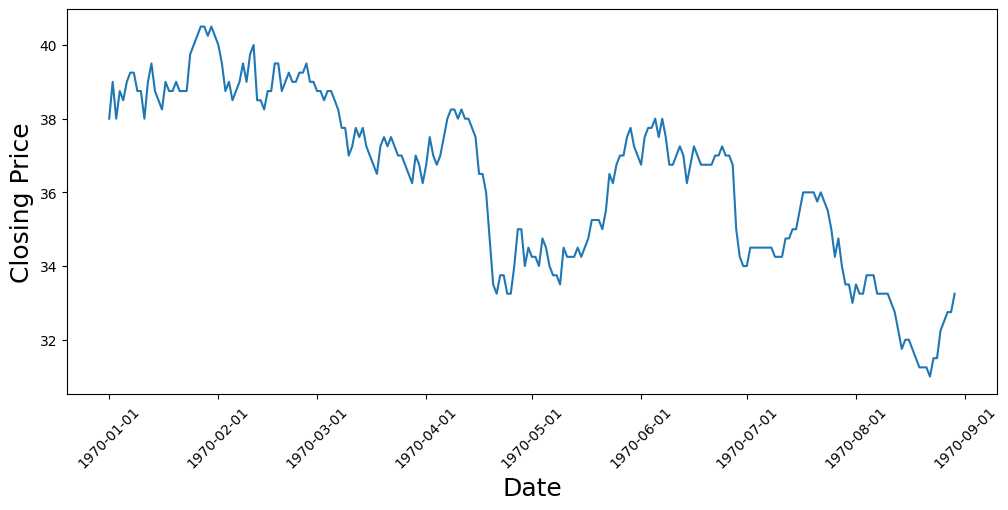

In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 5))
plt.plot(range(len(lm)), lm['cp_ptt'])
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# ข้อมูล DataFrame
x = lm[['cp_wti', 'cp_usd', 'cp_xau', 'vol_ptt']]
y = lm["cp_ptt"]

# แปลงข้อมูลให้อยู่ในรูปแบบ NumPy
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

# แบ่งข้อมูลเป็นชุดฝึกและชุดทดสอบ
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from keras.models import Sequential
from keras.layers import LSTM, Dense

# สร้างฟังก์ชันสำหรับสร้างโมเดล LSTM
def create_lstm_model(units_lstm1=200, units_lstm2=100, units_dense=50):
    model = Sequential()
    model.add(LSTM(units=units_lstm1, return_sequences=True, input_shape=(xtrain.shape[1], 1)))
    model.add(LSTM(units=units_lstm2, return_sequences=False))
    model.add(Dense(units=units_dense))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# กำหนดค่าที่คุณต้องการทดสอบ
param_grid = {
    'units_lstm1': [100, 200],
    'units_lstm2': [100, 150],
    'units_dense': [25, 50],
    'batch_size': [1, 32],
    'epochs': [50, 60],
}

# ใช้ Time Series Cross Validation
tscv = TimeSeriesSplit(n_splits=3)  # ใช้จำนวน Fold ตามที่คุณต้องการ

# สร้าง GridSearchCV เพื่อค้นหา parameter ที่ดีที่สุด
model = KerasRegressor(build_fn=create_lstm_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error', verbose=2)
grid_result = grid.fit(xtrain, ytrain)

# แสดงผลลัพธ์ parameter ที่ดีที่สุด
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


<ipython-input-263-eb44086457a0>:29: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_lstm_model, verbose=0)


Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=100, units_lstm2=100; total time=  16.4s
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=100, units_lstm2=100; total time=  28.7s
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=100, units_lstm2=100; total time=  42.7s
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=100, units_lstm2=150; total time=  26.9s
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=100, units_lstm2=150; total time=  38.2s
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=100, units_lstm2=150; total time=  59.9s
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=200, units_lstm2=100; total time=  28.6s
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=200, units_lstm2=100; total time=  42.0s
[CV] END batch_size=1, epochs=50, units_dense=25, units_lstm1=200, units_lstm2=100; total time= 1.5min
[CV] END bat

KeyboardInterrupt: ignored

In [ ]:
#กำหนดมีชั้น LSTM มากกว่าหนึ่งชั้นต่อกัน return_sequences=True
#ให้ผลลัพธ์เป็นเวกเตอร์เดียวสำหรับชั้นถัดไป return_sequences=False
#จำนวนฟีเจอร์ xtrain.shape[1], ช่วงเวลาที่ต้องการทำนาย 1
# สร้างโมเดล LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(150, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(150, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))
model.summary()


Model: "sequential_2913"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5824 (LSTM)            (None, 4, 200)            161600    
                                                                 
 lstm_5825 (LSTM)            (None, 100)               120400    
                                                                 
 dense_5816 (Dense)          (None, 50)                5050      
                                                                 
 dense_5817 (Dense)          (None, 1)                 51        
                                                                 
Total params: 287,101
Trainable params: 287,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=32, epochs=200) #epochs กำหนดจำนวนรอบการฝึกทั้งหมด  batch size ขนาดของกลุ่มข้อมูล ในแต่ละรอบการฝึก

Epoch 1/5
192/192 [==============================] - 7s 13ms/step - loss: 98.4891
Epoch 2/5
192/192 [==============================] - 2s 11ms/step - loss: 6.1785
Epoch 3/5
192/192 [==============================] - 2s 8ms/step - loss: 5.8707
Epoch 4/5
192/192 [==============================] - 2s 8ms/step - loss: 6.0325
Epoch 5/5
192/192 [==============================] - 2s 8ms/step - loss: 6.3013


In [ ]:
from sklearn.metrics import mean_squared_error
# ทำนายค่าจากชุดทดสอบ
y_pred = model.predict(xtest)
y_pred

2/2 [==============================] - 1s 18ms/step


array([[36.43285 ],
       [36.431877],
       [36.430634],
       [36.43026 ],
       [36.430637],
       [36.42893 ],
       [36.42885 ],
       [36.430313],
       [36.43217 ],
       [36.431934],
       [36.434097],
       [36.43038 ],
       [36.429737],
       [36.430534],
       [36.43242 ],
       [36.431084],
       [36.42895 ],
       [36.43239 ],
       [36.43288 ],
       [36.43044 ],
       [36.433586],
       [36.432457],
       [36.432873],
       [36.433407],
       [36.42911 ],
       [36.429413],
       [36.432392],
       [36.432842],
       [36.433167],
       [36.43081 ],
       [36.432327],
       [36.429337],
       [36.4328  ],
       [36.43371 ],
       [36.43222 ],
       [36.43063 ],
       [36.433662],
       [36.428516],
       [36.430695],
       [36.430332],
       [36.432606],
       [36.4324  ],
       [36.43196 ],
       [36.432472],
       [36.428577],
       [36.432682],
       [36.43012 ],
       [36.433495],
       [36.428387]], dtype=float32)

In [ ]:
#from sklearn.metrics import mean_squared_error

# ทำนายค่าจากชุดทดสอบ
#y_pred = model.predict(xtest)

# คำนวณค่า MSE
mse = mean_squared_error(ytest, y_pred)
print(f"Mean Squared Error (MSE): {mse*100}")


ValueError: ignored

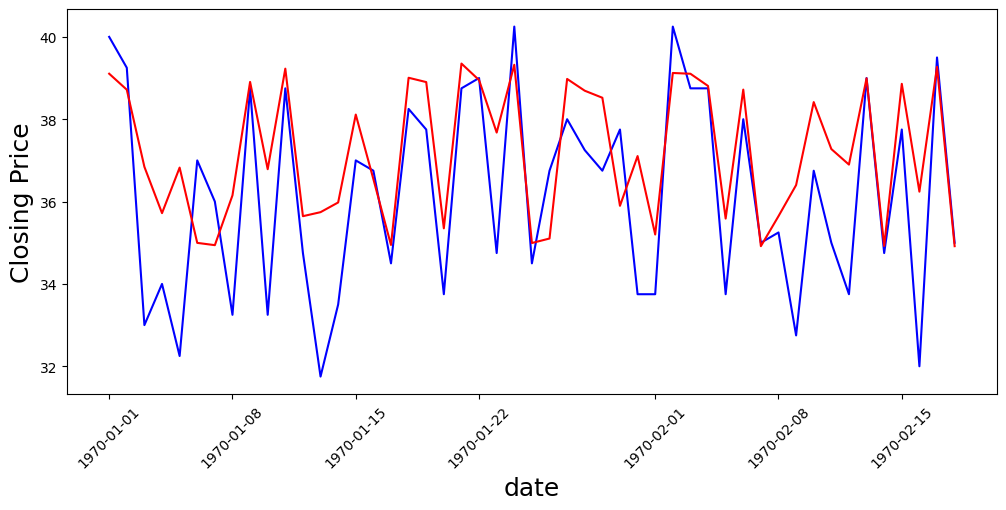

In [ ]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
#plt.plot(range(len(lm)), lm['cp_ptt'])
plt.plot(ytest, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.show()
